Jack Joiner

 - Quinn O'Conner
 - Ratul Pradhan
 - Reid Norton 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [3]:
def print_model(bias, Theta, X_names, model_name = None):
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='
    if not bias == 0:
        model_str += f' {bias:.2f}'
    for theta, x in zip(Theta, X_names):
        if theta == 0:
            continue
        else:
            model_str += f' + {theta:.2f}*{x}'
    print(model_str)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(R2_train)
print(R2_test)
print(MSE_train)
print(MSE_test)



0.9928262025191834
0.99285183178066
98.39719536660401
85.50162291627632


In [5]:
print_model(bias, coef, column_names, "True Model")
print_model(model_1.intercept_, model_1.coef_, column_names, "Model 1")

True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5
Model 1:
 y = -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5


#### Your written answers here

What are your model parameters?
 -  y = -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5

What were your MSE and R^2?
 - MSE: 85.5 
 - R2: 0.99



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [6]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 1 --> simple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

Xa = (0.6*X[:,2] + 0.4*X[:, 5]).reshape(-1,1)
X = np.hstack([X, Xa])
coef = np.append(coef,0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y



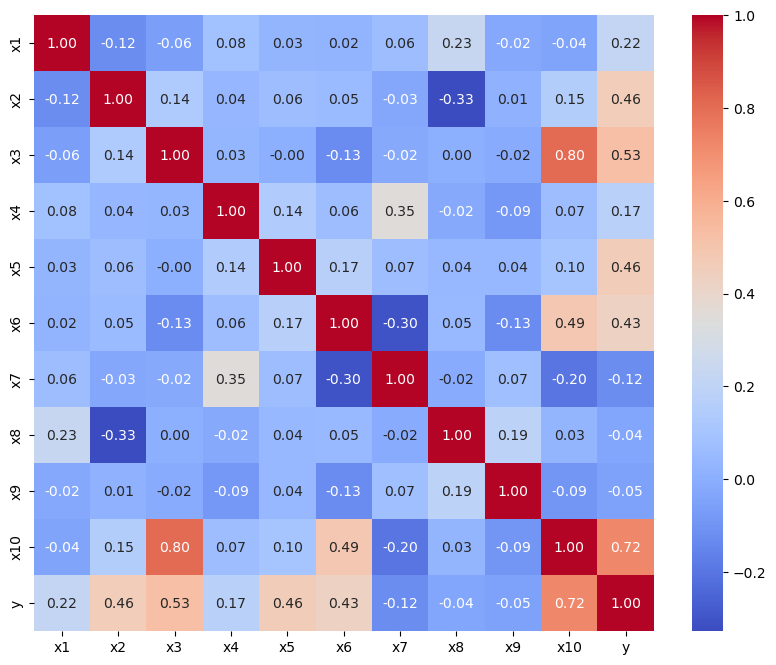

In [7]:
corr_matrix = reg2_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm')
plt.show()

In [8]:
candidate_idx = np.array([1,2,3,5,6,7,10])-1
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=9)

model_2 = LinearRegression()
model_2.fit(Z_train, y_train)

y_pred_train = model_2.predict(Z_train)
y_pred_test = model_2.predict(Z_test)
y_pred = model_2.predict(Z)

R2_train = model_2.score(Z_train, y_train)
R2_test = model_2.score(Z_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(R2_test)
print(MSE_test)

0.7759326869658635
20.991285099080518


In [9]:
print_model(bias, coef, column_names, "True Model")
print_model(model_2.intercept_, model_2.coef_, column_names, "Model 2")


True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Model 2:
 y = -15.03 + 58.37*x1 + 79.42*x2 + -4715890413261361.00*x3 + 8.40*x4 + -3143926942174211.00*x5 + -12.87*x6 + 7859817355435740.00*x7


#### Your written answers here

What are your model parameters?
 - y = -15.03 + 58.37*x1 + 79.42*x2 + -4715890413261361.00*x3 + 8.40*x4 + -3143926942174211.00*x5 + -12.87*x6 + 7859817355435740.00*x7

Which features (x1, x2...) were significant? Which were co-linear?
 - 1,2,3,5,6,7,10 were significant. X3 and x6 are co-linear to X10.
 
What were your MSE and R^2?
 - MSE = .78
 - R2 = 20.99



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

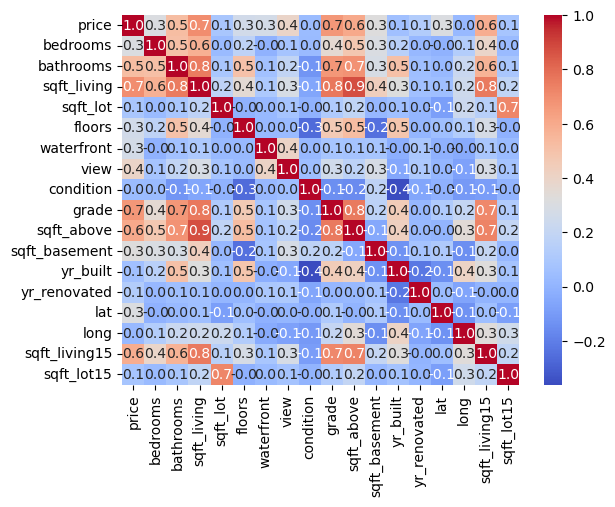

In [10]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)

correlation_matrix = housing_df.corr()
print(correlation_matrix)

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()



In [11]:
from sklearn.preprocessing import StandardScaler
features = ['grade', 'sqft_living','sqft_above']


X = housing_df[features]
y = housing_df['price']

X=housing_df[features]
y=housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_3 = LinearRegression()
model_3.fit(X_train_scaled, y_train)

y_pred_train = model_3.predict(X_train_scaled)
y_pred_test = model_3.predict(X_test_scaled)

R2_train = model_3.score(X_train_scaled, y_train)
R2_test = model_3.score(X_test_scaled, y_test)

print(R2_train)
print(R2_test)



0.5350324301339086
0.5636766029498526


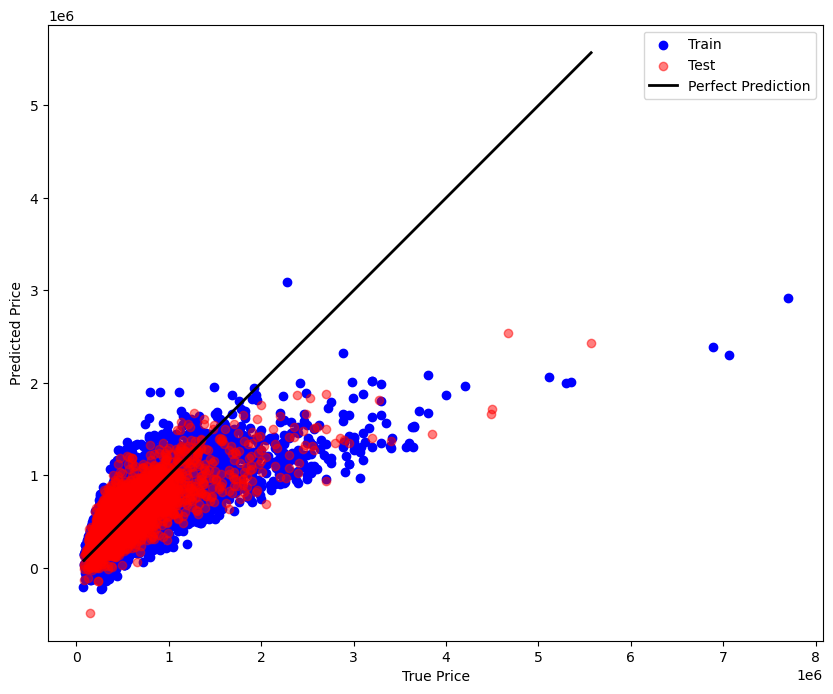

In [12]:
plt.figure (figsize=(10,8))
plt.scatter(y_train, y_pred_train, alpha = 1, color = 'blue', label = 'Train')
plt.scatter(y_test, y_pred_test, alpha = 0.5, color = 'red', label = 'Test')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', lw = 2, label = 'Perfect Prediction')

plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


#### Your written answers here
Which features are you using and why?
 
 - I decided to use grade, square feet living and square feet above becasue they had high correlation values to the targeted feature of price
 



### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [13]:
housing_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [14]:
X = housing_df.drop(['price'],axis=1)
feature_names = X.columns
print(feature_names)

y = housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

ridge_model = sk.linear_model.Ridge(alpha = 1)
ridge_model.fit(X_train_scaled, y_train)

R2_reg = ridge_model.score(X_test_scaled, y_test)
print(R2_reg)

coef = ridge_model.coef_
indices_sorted = np.argsort(np.abs(coef))[::-1]
three_indices = indices_sorted[:3]
print(three_indices)

print ("Top Three Features by Coefficient")
for idx in three_indices:
    print(f"{feature_names[idx]}: {coef[idx]:.2f}")
    


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
0.7121301700453495
[ 8  2 13]
Top Three Features by Coefficient
grade: 113086.95
sqft_living: 77814.73
lat: 77458.18


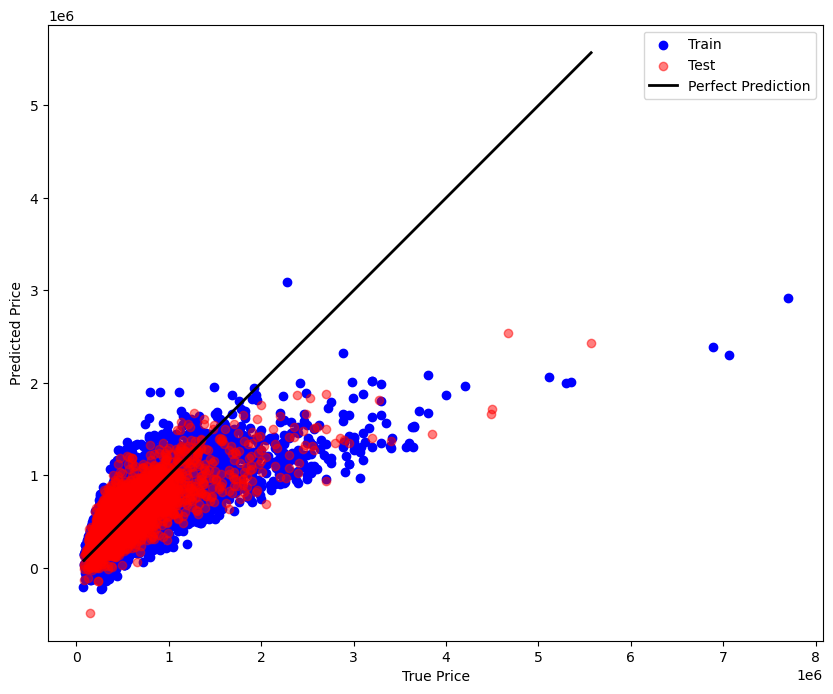

In [15]:
plt.figure (figsize=(10,8))
plt.scatter(y_train, y_pred_train, alpha = 1, color = 'blue', label = 'Train')
plt.scatter(y_test, y_pred_test, alpha = 0.5, color = 'red', label = 'Test')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', lw = 2, label = 'Perfect Prediction')

plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - I used a Ridge regression

Does your regularized model look better than your MLR? How so?
 - Yes there are few outliers and the R2 is higher (.71)

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [16]:
from sklearn.linear_model import Ridge

housing_df_low = housing_df[housing_df['price'] < 1000000]
housing_df_high = housing_df[housing_df['price'] >= 1000000]

feature_cols = [col for col in housing_df.columns if col not in ['price', 'date', 'zipcode']]
print(feature_cols)

X_low = housing_df_low[feature_cols]
y_low = housing_df_low['price']

X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=9)

scaler_low = StandardScaler()
X_low_train_scaled = scaler_low.fit_transform(X_low_train)
X_low_test_scaled = scaler_low.transform(X_low_test)

ridge_low = Ridge(alpha=100)
ridge_low.fit(X_low_train_scaled, y_low_train)
y_low_pred = ridge_low.predict(X_low_test_scaled)

r2_low = ridge_low.score(X_low_test_scaled, y_low_test)
print(f"R^2 for Ridge regression (low-priced homes): {r2_low:.2f}")

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
R^2 for Ridge regression (low-priced homes): 0.69


In [17]:
X_high = housing_df_high[feature_cols]
y_high = housing_df_high['price']

X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=9)

scaler_high = StandardScaler()
X_high_train_scaled = scaler_high.fit_transform(X_high_train)
X_high_test_scaled = scaler_high.transform(X_high_test)

ridge_high = Ridge(alpha=1000)
ridge_high.fit(X_high_train_scaled, y_high_train)
y_high_pred = ridge_high.predict(X_high_test_scaled)

r2_high = ridge_high.score(X_high_test_scaled, y_high_test)
print(f"R^2 for Ridge regression (high-priced homes): {r2_high:.2f}")

R^2 for Ridge regression (high-priced homes): 0.47


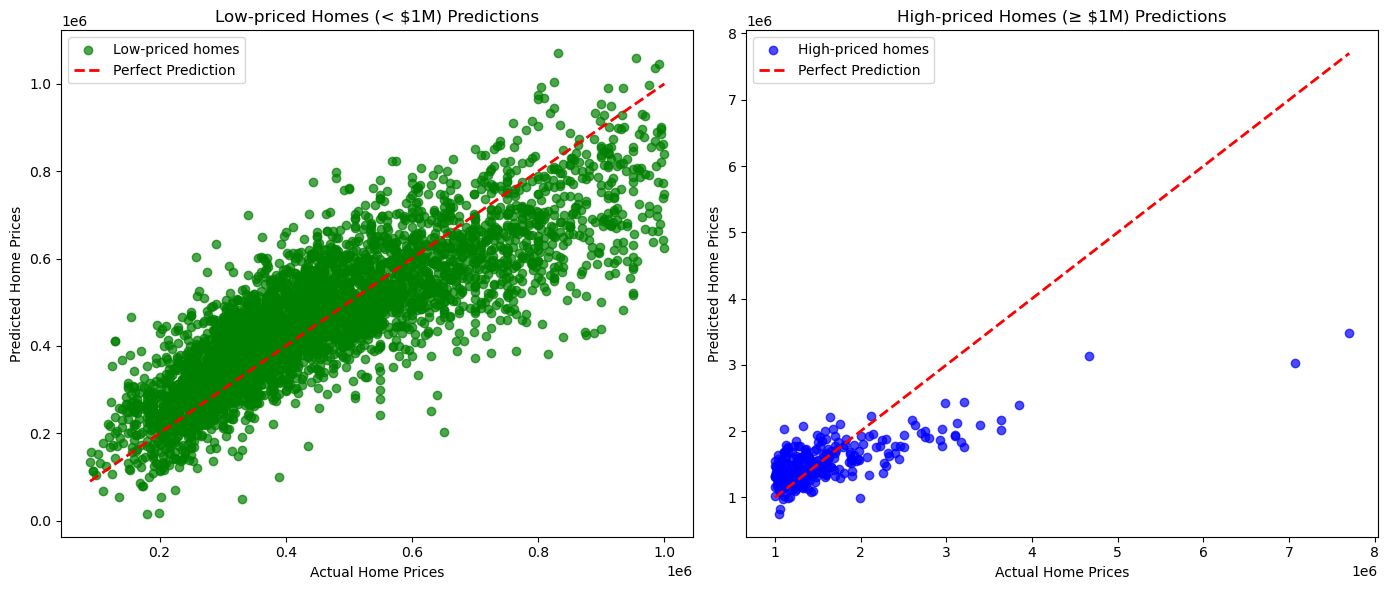

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(y_low_test, y_low_pred, alpha=0.7, color='green', label='Low-priced homes')
plt.plot([y_low_test.min(), y_low_test.max()], [y_low_test.min(), y_low_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Low-priced Homes (< $1M) Predictions")
plt.legend()

 


plt.subplot(1,2,2)
plt.scatter(y_high_test, y_high_pred, alpha=0.7, color='blue', label='High-priced homes')
plt.plot([y_high_test.min(), y_high_test.max()], [y_high_test.min(), y_high_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("High-priced Homes (≥ $1M) Predictions")
plt.legend()

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models? - 


  - Low priced homes: R^2=  0.69
  - High priced homes: R^2=
   0.47
  
 
